### Importation Of Packages

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 4.0 MB/s eta 0:00:00


In [ ]:
#import important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import nltk

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#modules for metrics
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, roc_curve, roc_auc_score

import spacy

import warnings
warnings.filterwarnings("ignore")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Importation

In [ ]:
#Load cyberbullying file
cyber_df = pd.read_csv('/content/drive/MyDrive/cb_multi_labeled_balanced.csv')
cyber_df.head()

,text,label
0,@ZubearSays Any real nigga isn't letting this ...,ethnicity/race
1,@MoradoSkittle @prolifejewess @DAConsult @Kell...,not_cyberbullying
2,"the only thing i wish, i wish a nigga would",ethnicity/race
3,You saudias are not friends of Muslim idiots c...,religion
4,@JaydenT2399 @TractorLaw @holmes_gael @erconge...,religion


In [ ]:
cyber_df.tail()

,text,label
99985,Thank fuck they didn’t dance remix Peru #LoveI...,not_cyberbullying
99986,Sierra Canyon vs. Alemany - California High Sc...,not_cyberbullying
99987,@queenbellaxoxo @PontiacMadeDDG @HalleBailey B...,gender/sexual
99988,What you like yo nigga to call you,ethnicity/race
99989,@kirkfranklin Happy CAKE DAY 🌬🎂🎁🎈🎉,not_cyberbullying


## Data Cleaning and Validation

#### Sanity Checks

In [ ]:
cyber_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99990 entries, 0 to 99989
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    99990 non-null  object
 1   label   99990 non-null  object
dtypes: object(2)
memory usage: 1.5+ MB


In [ ]:
cyber_df['text'].unique

<bound method Series.unique of 0        @ZubearSays Any real nigga isn't letting this ...
1        @MoradoSkittle @prolifejewess @DAConsult @Kell...
2              the only thing i wish, i wish a nigga would
3        You saudias are not friends of Muslim idiots c...
4        @JaydenT2399 @TractorLaw @holmes_gael @erconge...
                               ...                        
99985    Thank fuck they didn’t dance remix Peru #LoveI...
99986    Sierra Canyon vs. Alemany - California High Sc...
99987    @queenbellaxoxo @PontiacMadeDDG @HalleBailey B...
99988                   What you like yo nigga to call you
99989                   @kirkfranklin Happy CAKE DAY 🌬🎂🎁🎈🎉
Name: text, Length: 99990, dtype: object>

In [ ]:
cyber_df.describe()

,text,label
count,99990,99990
unique,99989,4
top,#NAME?,not_cyberbullying
freq,2,50000


In [ ]:
#Finding missing values
cyber_df.isna().sum()

text     0
label    0
dtype: int64

In [ ]:
#Unique Values
cyber_df['text'].nunique()

99989

### Exploratory Data Analysis

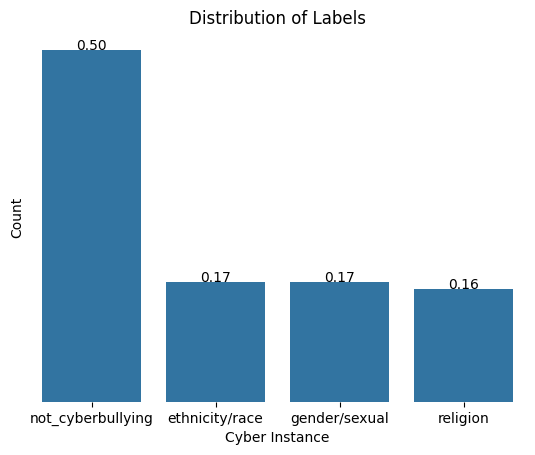

In [ ]:
label_counts = cyber_df['label'].value_counts().reset_index()
label_counts.columns = ['label', 'count']
label_counts

# # Bar Chart
sns.barplot(x='label', y='count',data=label_counts)
sns.despine(top=True, right=True, bottom=True, left= True)
total=len(cyber_df)
for p in plt.gca().patches:
  height= p.get_height()
  plt.gca().text(p.get_x()+p.get_width()/2., height + 3, '{:1.2f}'.format(height/total), ha="center")
plt.title('Distribution of Labels')
plt.xlabel('Cyber Instance')
plt.ylabel('Count')
plt.yticks([])
plt.savefig('label_image1.jpg')
plt.show()


In [ ]:
#Converting target variable into two classes
cyber_df.replace({'ethnicity/race': 'cyber_bullying',
                 'religion':'cyber_bullying', 'gender/sexual':'cyber_bullying'}, inplace=True)

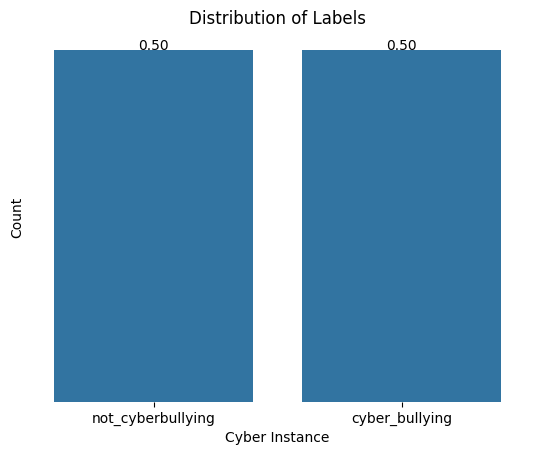

In [ ]:
# Counting labels
label_counts = cyber_df['label'].value_counts().reset_index()
label_counts.columns = ['label', 'count']
label_counts

# # Bar Chart
sns.barplot(x='label', y='count',data=label_counts)
sns.despine(top=True, right=True, bottom=True, left= True)
total=len(cyber_df)
for p in plt.gca().patches:
  height= p.get_height()
  plt.gca().text(p.get_x()+p.get_width()/2., height + 3, '{:1.2f}'.format(height/total), ha="center")
plt.title('Distribution of Labels')
plt.xlabel('Cyber Instance')
plt.ylabel('Count')
plt.yticks([])
plt.savefig('label_image.jpg')
plt.show()



### Data Cleaning

In [ ]:
#Dropping Duplicates values in the text column
cyber_df.drop_duplicates(subset = ['text'], inplace = True)
cyber_df.dropna(inplace = True)

In [ ]:
def percent(x):
  return '{:1.1f}%'.format(x/total*100)

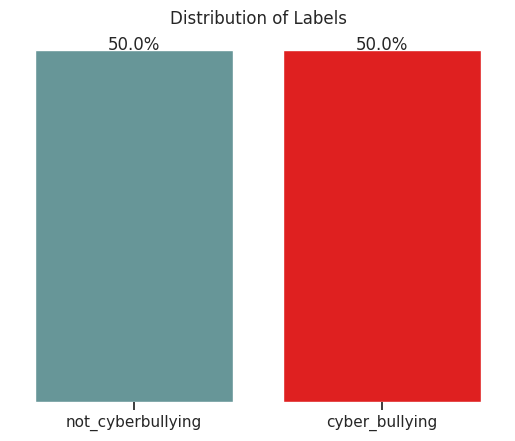

In [ ]:
#VisuaLising Distribution After Dropping duplicates
# Bar Chart
sns.set(style='ticks')
colors = ['cadetblue','red']
sns.barplot(x='label', y='count',data=label_counts, hue='label',palette= colors)
#function to convert into percent and

sns.despine(top=True, right=True, bottom=True, left= True)
total=len(cyber_df)
for p in plt.gca().patches:
  height= p.get_height()
  plt.gca().text(p.get_x()+p.get_width()/2., height + 0.5, percent(height), ha="center")
plt.title('Distribution of Labels')
plt.xlabel('')
plt.ylabel('')
plt.yticks([])
plt.savefig('label_image.jpg')
plt.show()

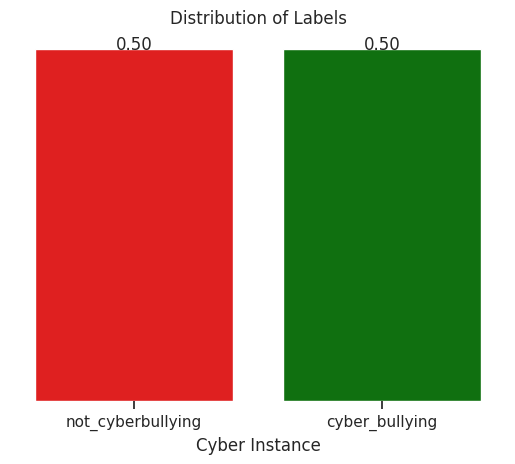

In [ ]:
sns.set(style='ticks')
colors = ['red','green']
sns.barplot(x='label', y='count',data=label_counts, hue='label',palette= colors)

sns.despine(top=True, right=True, bottom=True, left= True)
total=len(cyber_df)
for p in plt.gca().patches:
  height= p.get_height()
  plt.gca().text(p.get_x()+p.get_width()/2., height + 3, '{:1.2f}'.format(height/total), ha='center')
plt.title('Distribution of Labels')
plt.xlabel('Cyber Instance')
plt.ylabel('')
plt.yticks([])
plt.savefig('label_image.jpg')
plt.show()

In [ ]:
#info after dropping duplicates in text column
cyber_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99989 entries, 0 to 99989
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    99989 non-null  object
 1   label   99989 non-null  object
dtypes: object(2)
memory usage: 2.3+ MB


In [ ]:
cyber_df['text'].nunique()

99989

In [ ]:
cyber_df['text'].iloc[4]

'@JaydenT2399 @TractorLaw @holmes_gael @erconger @Acyn And yet the MAGA want to do just that. The Judah Christian and Muslim believe system doesn\'t own the exclusive rights to common morals, not that most "xians" actually follow it. I know more heathens, pagans and atheists who are way more Christ-like than most Christians.'

In [ ]:
cyber_df['text'].iloc[1000]

"He Knew He Was Going To Have Me Tell You The Truth He Is Arabic He Taught Me The Quran For This Prophecy He is Your Father He Created Your Christians Overwhelmed Right Now Isalm Doesn't Seem To Care I Can't Breathe He Is Not Happy Christians One Christian Woman Not A Muslim Woman"

## Data Preprocessing

#### Encoding the Labels

In [ ]:
#changing categorical into numerical
texts = cyber_df['text']
labels = cyber_df['label']

label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)
label_mapping = dict(zip(cyber_df['label'], encoded_labels))
label_mapping

{'cyber_bullying': 0, 'not_cyberbullying': 1}

In [ ]:
try:
    # Loading the en_core_web_sm model
    nlp = spacy.load('en_core_web_sm')
except OSError:
    import subprocess
    import sys
    # Installing the model if not present
    subprocess.run([sys.executable, "-m", "spacy", "download", "en_core_web_sm"])
    nlp = spacy.load('en_core_web_sm')

print("SpaCy model loaded successfully.")

SpaCy model loaded successfully.


#### Tokenization and Lemmatization

In [ ]:
def tokenize_and_lemmatize(texts):
    lemmatized_texts = []
    for doc in nlp.pipe(texts, batch_size=1000):  #Tokenization  #Adjust batch_size as needed
        lemmatized_tokens = [token.lemma_ for token in doc]
        lemmatized_texts.append(lemmatized_tokens)
    return lemmatized_texts

# Applying the function to tokenize and lemmatize each text in batches
cyber_df['lemmatized_tokens'] = tokenize_and_lemmatize(cyber_df['text'])

# Printing the DataFrame to see the results
print(cyber_df.head())

                                                text              label  \
0  @ZubearSays Any real nigga isn't letting this ...     cyber_bullying   
1  @MoradoSkittle @prolifejewess @DAConsult @Kell...  not_cyberbullying   
2        the only thing i wish, i wish a nigga would     cyber_bullying   
3  You saudias are not friends of Muslim idiots c...     cyber_bullying   
4  @JaydenT2399 @TractorLaw @holmes_gael @erconge...     cyber_bullying   

                                   lemmatized_tokens  
0  [@zubearsays, any, real, nigga, be, not, let, ...  
1  [@moradoskittle, @prolifejewess, @DAConsult, @...  
2  [the, only, thing, I, wish, ,, I, wish, a, nig...  
3  [you, saudia, be, not, friend, of, muslim, idi...  
4  [@JaydenT2399, @tractorlaw, @holmes_gael, @erc...  


#### Removing Symbols and Emjois

In [ ]:
import re

def remove_symbols_and_emojis(lemmatized_texts):
    clean_texts = []
    for tokens in lemmatized_texts:
        clean_tokens = [token for token in tokens if token.isalnum()]  # Keep only alphanumeric tokens
        clean_text = ' '.join(clean_tokens)
        clean_texts.append(clean_text)
    return clean_texts

# Applying the function to remove symbols and emojis from lemmatized texts
cyber_df['lemmatized_tokens'] = remove_symbols_and_emojis(cyber_df['lemmatized_tokens'])

# Printing the DataFrame to see the results
print(cyber_df.head())

                                                text              label  \
0  @ZubearSays Any real nigga isn't letting this ...     cyber_bullying   
1  @MoradoSkittle @prolifejewess @DAConsult @Kell...  not_cyberbullying   
2        the only thing i wish, i wish a nigga would     cyber_bullying   
3  You saudias are not friends of Muslim idiots c...     cyber_bullying   
4  @JaydenT2399 @TractorLaw @holmes_gael @erconge...     cyber_bullying   

                                   lemmatized_tokens  
0              any real nigga be not let this happen  
1  I do not even mention Mexico but the US be far...  
2         the only thing I wish I wish a nigga would  
3  you saudia be not friend of muslim idiot cheap...  
4  and yet the MAGA want to do just that the Juda...  


In [ ]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
from wordcloud import STOPWORDS


#### Removing Stop Words and Generating a WordCloud

In [ ]:
from PIL import Image

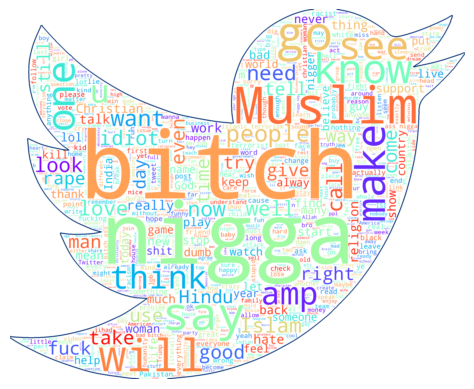

In [ ]:
# Generating a word cloud image
stopwords = set(STOPWORDS)
textt = " ".join(text for text in cyber_df['lemmatized_tokens'])
mask = np.array(Image.open("/content/twitter.png"))
wordcloud = WordCloud(stopwords=stopwords,background_color='white', max_words=1000,
                      mask=mask,contour_color='#023075',contour_width=6,colormap='rainbow').generate(textt)
# creating image as cloud
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
# storing to file
plt.savefig("wordcloudcb.png", format="png")
plt.show()

#### Feature Extraction Using TF-IDF

In [ ]:
# Feature extraction using TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words ="english", max_features=1000)
X = tfidf_vectorizer.fit_transform(cyber_df['lemmatized_tokens'])
y = encoded_labels


## Model Building

In [ ]:
#splitting the data into training and testing datasets(75:25)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify = y, random_state=42)

#### 1. Logistic Regression

In [ ]:
# Training the Logistic Regression
lrc = LogisticRegression()
lrc.fit(X_train, y_train)

# Predicting on the test set
y_pred = lrc.predict(X_test)

print("Training set score: {:.3f}".format(lrc.score(X_train, y_train)))
print("Test set score: {:.3f}".format(lrc.score(X_test, y_test)))


# Evaluating the model
print(classification_report(y_test, y_pred))

Training set score: 0.993
Test set score: 0.992
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     12498
           1       0.99      1.00      0.99     12500

    accuracy                           0.99     24998
   macro avg       0.99      0.99      0.99     24998
weighted avg       0.99      0.99      0.99     24998



In [ ]:
from sklearn.naive_bayes import BernoulliNB

# Training the Naive Bayes classifier
bnb = BernoulliNB()
bnb.fit(X_train, y_train)

# Predicting on the test set
y_pred_bnb = bnb.predict(X_test)

print("Training set score: {:.3f}".format(bnb.score(X_train, y_train)))
print("Test set score: {:.3f}".format(bnb.score(X_test, y_test)))

# Evaluating the model
print(classification_report(y_test, y_pred))

Training set score: 0.976
Test set score: 0.974
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     12498
           1       0.99      1.00      0.99     12500

    accuracy                           0.99     24998
   macro avg       0.99      0.99      0.99     24998
weighted avg       0.99      0.99      0.99     24998



#### 4. Decision Tree Classifier

In [ ]:
# Training the Decision Tree Regression classifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Predicting on the test set
y_pred_dt = dt.predict(X_test)

print("Training set score: {:.3f}".format(dt.score(X_train, y_train)))
print("Test set score: {:.3f}".format(dt.score(X_test, y_test)))


# Evaluating the model
print(classification_report(y_test, y_pred_dt))

Training set score: 0.999
Test set score: 0.992
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     12498
           1       0.99      0.99      0.99     12500

    accuracy                           0.99     24998
   macro avg       0.99      0.99      0.99     24998
weighted avg       0.99      0.99      0.99     24998



#### 5. Random Forest Classifier

In [ ]:
# Training the Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

# Predicting on the test set
y_pred_rf = rf.predict(X_test)

print("Training set score: {:.3f}".format(rf.score(X_train, y_train)))
print("Test set score: {:.3f}".format(rf.score(X_test, y_test)))


# Evaluating the model
print(classification_report(y_test, y_pred_rf))

Training set score: 0.999
Test set score: 0.994
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     12498
           1       0.99      1.00      0.99     12500

    accuracy                           0.99     24998
   macro avg       0.99      0.99      0.99     24998
weighted avg       0.99      0.99      0.99     24998



#### 5. Gradient Boost Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)

# Predicting on the test set
y_pred_knn = gbc.predict(X_test)

print("Training set score: {:.3f}".format(gbc.score(X_train, y_train)))
print("Test set score: {:.3f}".format(gbc.score(X_test, y_test)))

# Evaluating the model
print(classification_report(y_test, y_pred))

Training set score: 0.985
Test set score: 0.985
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     12498
           1       0.99      1.00      0.99     12500

    accuracy                           0.99     24998
   macro avg       0.99      0.99      0.99     24998
weighted avg       0.99      0.99      0.99     24998



#### Hyperparameter Tuning

In [ ]:
# Function to evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    train_f1 = f1_score(y_train, y_train_pred)
    test_f1 = f1_score(y_test, y_test_pred)

    print(f'Train Accuracy: {train_accuracy:.4f}')
    print(f'Test Accuracy: {test_accuracy:.4f}')
    print(f'Train F1 Score: {train_f1:.4f}')
    print(f'Test F1 Score: {test_f1:.4f}')

    print('Classification Report (Test Data):')
    print(classification_report(y_test, y_test_pred))

    print('Confusion Matrix (Test Data):')
    sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d', cmap='Blues')
    plt.show()

    return train_accuracy, test_accuracy, train_f1, test_f1

In [ ]:
# Define models
models = {
    'LogisticRegression': LogisticRegression(),
    'BernoulliNB': BernoulliNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'GradientBoost': GradientBoostingClassifier()}

# Define parameter grids for each model
param_grids = {
    'LogisticRegression': {'C': [0.1, 1, 10],'penalty': ['l1', 'l2'],'solver': ['liblinear']},
    'BernoulliNB' : {'alpha': [0.1, 1.0, 10.0],'fit_prior': [True, False]},
    'Decision Tree': {'max_depth': [None, 10, 20], 'min_samples_leaf': [1, 5, 10]},
    'Random Forest': {'n_estimators': [100, 200], 'max_depth': [10, 20]},
    'GradientBoost': {'learning_rate': [0.1, 1],'n_estimators': [100,200]}}


Model: LogisticRegression
Best Parameters: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Train Accuracy: 0.9949
Test Accuracy: 0.9939
Train F1 Score: 0.9949
Test F1 Score: 0.9939
Classification Report (Test Data):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     12498
           1       0.99      1.00      0.99     12500

    accuracy                           0.99     24998
   macro avg       0.99      0.99      0.99     24998
weighted avg       0.99      0.99      0.99     24998

Confusion Matrix (Test Data):


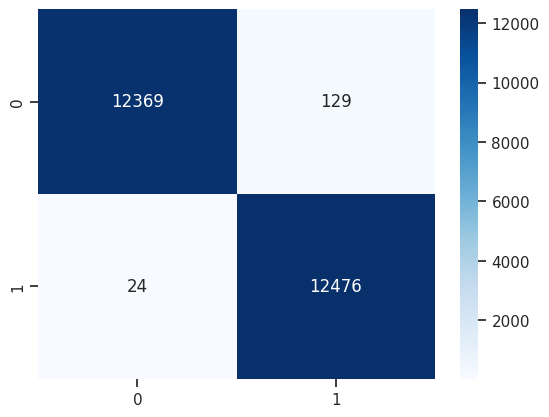


Model: BernoulliNB
Best Parameters: {'alpha': 10.0, 'fit_prior': True}
Train Accuracy: 0.9779
Test Accuracy: 0.9768
Train F1 Score: 0.9776
Test F1 Score: 0.9765
Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     12498
           1       0.99      0.96      0.98     12500

    accuracy                           0.98     24998
   macro avg       0.98      0.98      0.98     24998
weighted avg       0.98      0.98      0.98     24998

Confusion Matrix (Test Data):


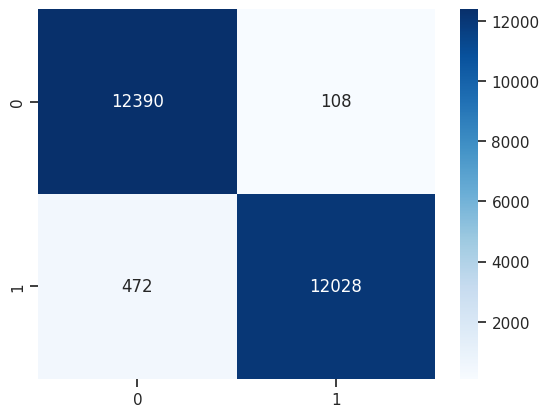


Model: Decision Tree
Best Parameters: {'max_depth': None, 'min_samples_leaf': 5}
Train Accuracy: 0.9948
Test Accuracy: 0.9930
Train F1 Score: 0.9948
Test F1 Score: 0.9930
Classification Report (Test Data):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     12498
           1       0.99      1.00      0.99     12500

    accuracy                           0.99     24998
   macro avg       0.99      0.99      0.99     24998
weighted avg       0.99      0.99      0.99     24998

Confusion Matrix (Test Data):


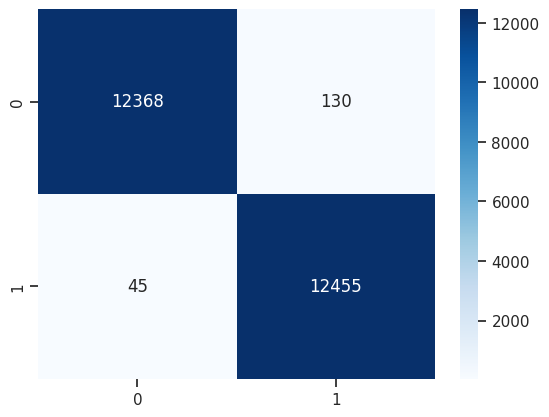


Model: Random Forest
Best Parameters: {'max_depth': 20, 'n_estimators': 200}
Train Accuracy: 0.9923
Test Accuracy: 0.9903
Train F1 Score: 0.9924
Test F1 Score: 0.9904
Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     12498
           1       0.99      0.99      0.99     12500

    accuracy                           0.99     24998
   macro avg       0.99      0.99      0.99     24998
weighted avg       0.99      0.99      0.99     24998

Confusion Matrix (Test Data):


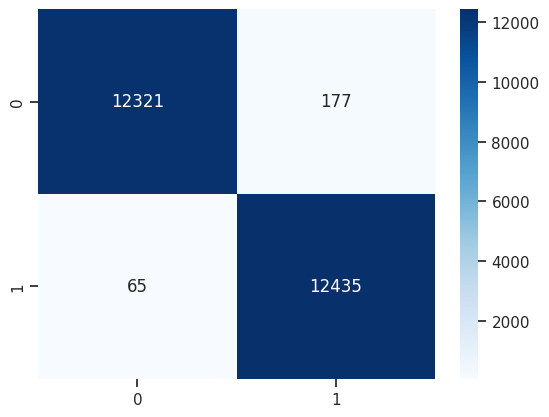


Model: GradientBoost
Best Parameters: {'learning_rate': 1, 'n_estimators': 200}
Train Accuracy: 0.9939
Test Accuracy: 0.9916
Train F1 Score: 0.9939
Test F1 Score: 0.9917
Classification Report (Test Data):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     12498
           1       0.99      1.00      0.99     12500

    accuracy                           0.99     24998
   macro avg       0.99      0.99      0.99     24998
weighted avg       0.99      0.99      0.99     24998

Confusion Matrix (Test Data):


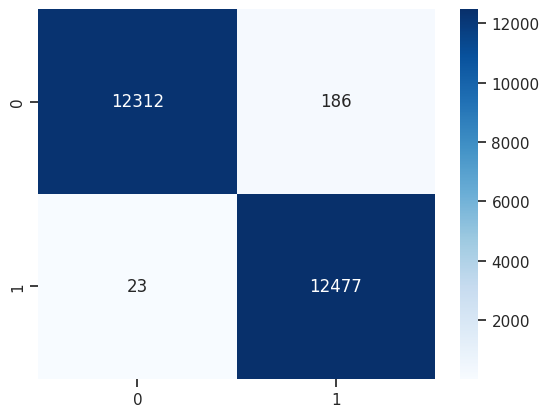

In [ ]:
# Using Grid search to find the best hyperparameter for each model
results = []
best_models = {}
for model_name, model in models.items():
    print(f'\nModel: {model_name}')
    grid_search = GridSearchCV(model, param_grids[model_name], cv=5, scoring='f1')
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    best_models[model_name] = best_model
    print(f'Best Parameters: {grid_search.best_params_}')

    train_acc, test_acc, train_f1, test_f1 = evaluate_model(best_model, X_train, X_test, y_train, y_test)

    results.append({
        'Model': model_name,
        'Best Params': grid_search.best_params_,
        'Train Accuracy': train_acc,
        'Test Accuracy': test_acc,
        'Train F1 Score': train_f1,
        'Test F1 Score': test_f1

    })


## Model Evaluation

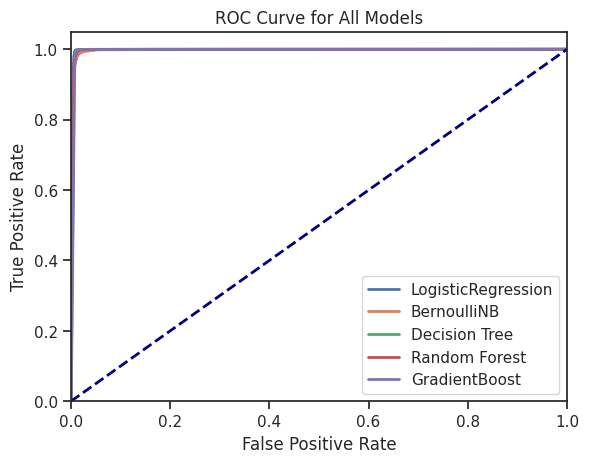

<Figure size 640x480 with 0 Axes>

In [ ]:
from sklearn.metrics import roc_curve,auc
plt.figure()

for model_name, best_model in best_models.items():
    # Predicting probabilities
    y_score = best_model.predict_proba(X_test)[:, 1]

    # Computing ROC curve and ROC area
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)

    # Plotting the ROC curve
    plt.plot(fpr, tpr, lw=2, label=f'{model_name}')

# Plotting the diagonal line for random guess
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for All Models')
plt.legend(loc="lower right")
plt.show()
plt.savefig("roc.png", format="jpg")
#change y scale

In [ ]:
best_models

## Model Comparison

In [ ]:
results_df = pd.DataFrame(results).sort_values(by='Test Accuracy', ascending=False)
results_df.reset_index(drop=True)


In [ ]:
model_scores= results_df[['Model','Test Accuracy','Test Accuracy']]
model_scores

In [ ]:
results_df = pd.DataFrame(results)
print(results_df)

# Plotting the results
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.ravel()

metrics = ['Train Accuracy', 'Test Accuracy', 'Train F1 Score', 'Test F1 Score']

for idx, metric in enumerate(metrics):
    sns.barplot(x='Model', y=metric, data=results_df, ax=axes[idx], palette='viridis')
    axes[idx].set_title(f'{metric} Comparison')
    axes[idx].set_ylabel(metric)
    axes[idx].set_xlabel('Model')
    for item in axes[idx].get_xticklabels():
        item.set_rotation(45)

plt.tight_layout()
plt.show()

## Model Selection

In [ ]:
# Finding the best model based on Test Accuracy and Test F1 Score
best_model_accuracy_row = results_df.loc[results_df['Test Accuracy'].idxmax()]
best_model_f1_row = results_df.loc[results_df['Test F1 Score'].idxmax()]

print("Best Model based on Test Accuracy:")
print(best_model_accuracy_row)

print("\nBest Model based on Test F1 Score:")
print(best_model_f1_row)

results_df['Average Score'] = (results_df['Test Accuracy'] + results_df['Test F1 Score']) / 2
best_model_combined_row = results_df.loc[results_df['Average Score'].idxmax()]

print("\nBest Model based on Combined Test Accuracy and Test F1 Score:")
print(best_model_combined_row)

In [ ]:
#Checking the correct predictions of the best models
best_lrc_params = {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}

lrc_model = LogisticRegression(**best_lrc_params)

lrc_model.fit(X_train, y_train)

y_test_pred = lrc_model.predict(X_test)

# DataFrame to show true vs predicted values
prediction_df = pd.DataFrame({
    'True Label': y_test,
    'Predicted Label': y_test_pred
})

prediction_df['Correct Prediction'] = prediction_df['True Label'] == prediction_df['Predicted Label']

print(prediction_df.head(50))

prediction_df.value_counts()

In [ ]:
sns.lineplot(prediction_df['True Label'])
sns.lineplot(prediction_df['Predicted Label'])
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("Predicted vs True Values")
plt.show()

### Conclusion